In [96]:
from tensorflow import keras
import edgeimpulse as ei
from keras import layers
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from PIL import Image
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
os.chdir(r"C:\Users\marco\Downloads\Plant_ Leaf_Diseases-20250304T222201Z-001\Plant_ Leaf_Diseases")

In [9]:
os.listdir()

['Apple-Apple_scab',
 'Apple-Black_rot',
 'Apple-Cedar_apple_rust',
 'Apple-healthy',
 'Cherry-healthy',
 'Cherry-Powdery_mildew',
 'Tomato-Bacterial_spot',
 'Tomato-Healthy',
 'Tomato-Leaf_Mold',
 'Tomato-Tomato_mosaic_virus']

# Cenário 1 - Classificação de folhas de Tomate, Cereja e Maça

In [14]:
# Define the main directory containing the folders
data_dir = os.getcwd()  # Replace with your actual directory

# Define the expected classes
classes = ['Apple', 'Tomato', 'Cherry']
class_to_idx = {cls: idx for idx, cls in enumerate(classes)}

# Lists to store images and their labels
images = []
labels = []

# Process each folder in the directory
for folder in os.listdir(data_dir):
    # Extract the plant type from the folder name (before the hyphen)
    plant_type = folder.split('-')[0]
    if plant_type not in classes:
        print(f"Skipping folder '{folder}': plant type '{plant_type}' is not in {classes}")
        continue

    folder_path = os.path.join(data_dir, folder)
    if not os.path.isdir(folder_path):
        continue

    # Process each image in the folder
    for file_name in os.listdir(folder_path):
        # Check for common image file extensions
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            file_path = os.path.join(folder_path, file_name)
            try:
                # Open the image and convert it to RGB
                img = Image.open(file_path).convert('RGB')
                # Optionally resize the image (example: 224x224 pixels)
                img = img.resize((224, 224))
                # Convert image to numpy array
                img_array = np.array(img)
                images.append(img_array)
                labels.append(class_to_idx[plant_type])
            except Exception as e:
                print(f"Error processing image {file_path}: {e}")

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

# One-hot encode labels
num_classes = len(classes)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Print dataset shapes
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

# Input shape for the model (example: height, width, channels)
input_shape = x_train[0].shape
print(f"Input shape: {input_shape}")


x_train shape: (8112, 224, 224, 3), y_train shape: (8112, 3)
x_test shape: (2028, 224, 224, 3), y_test shape: (2028, 3)
Input shape: (224, 224, 3)


In [16]:
# Build the model

model_exp1 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)



model_exp1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dropout (Dropout)           (None, 186624)            0

In [18]:
batch_size = 128
epochs = 20

model_exp1.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history1 = model_exp1.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)

Epoch 1/20
58/58 [==============================] - 141s 2s/step - loss: 91.9755 - accuracy: 0.5115 - val_loss: 0.8213 - val_accuracy: 0.6330
Epoch 2/20
58/58 [==============================] - 137s 2s/step - loss: 0.7306 - accuracy: 0.6767 - val_loss: 0.7130 - val_accuracy: 0.7475
Epoch 3/20
58/58 [==============================] - 138s 2s/step - loss: 0.5632 - accuracy: 0.7777 - val_loss: 0.5796 - val_accuracy: 0.7931
Epoch 4/20
58/58 [==============================] - 138s 2s/step - loss: 0.4289 - accuracy: 0.8352 - val_loss: 0.6654 - val_accuracy: 0.8042
Epoch 5/20
58/58 [==============================] - 138s 2s/step - loss: 0.3203 - accuracy: 0.8781 - val_loss: 0.5587 - val_accuracy: 0.8264
Epoch 6/20
58/58 [==============================] - 136s 2s/step - loss: 0.2884 - accuracy: 0.8958 - val_loss: 0.5145 - val_accuracy: 0.8485
Epoch 7/20
58/58 [==============================] - 135s 2s/step - loss: 0.4526 - accuracy: 0.8382 - val_loss: 0.8202 - val_accuracy: 0.7771
Epoch 8/20
5

In [20]:
score = model_exp1.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.0408265590667725
Test accuracy: 0.8550295829772949


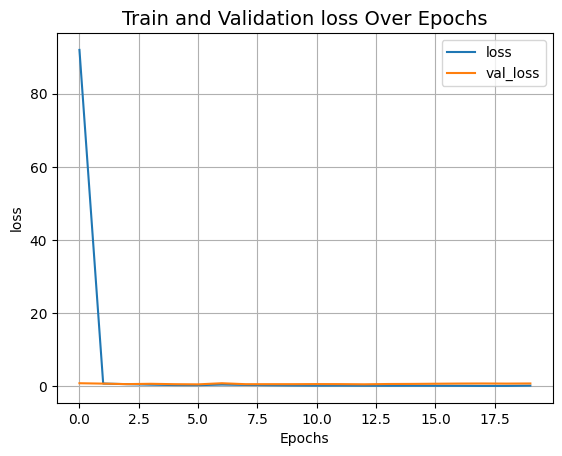

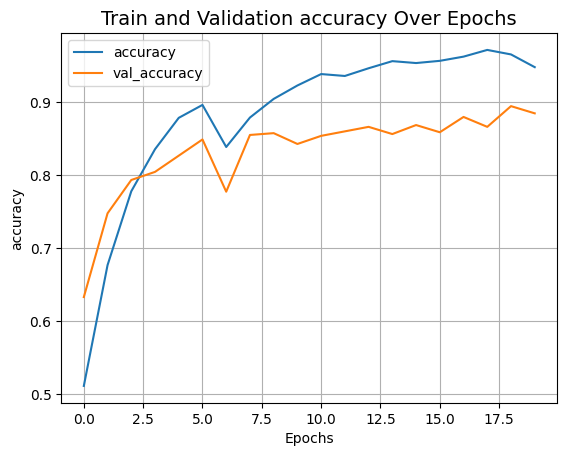

In [22]:
def plot_history(item):
    plt.plot(history1.history[item], label=item)
    plt.plot(history1.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


plot_history("loss")
plot_history("accuracy")

# Cenário 2

In [46]:
# Define the main directory containing the folders
data_dir = os.getcwd()  # Replace with your actual directory

# Define the expected classes
classes = ['Apple-Apple_scab', 'Apple-Black_rot','Apple-Cedar_apple_rust','Apple-healthy']
class_to_idx = {cls: idx for idx, cls in enumerate(classes)}

# Lists to store images and their labels
images = []
labels = []

# Process each folder in the directory
for folder in os.listdir(data_dir):
    # Extract the plant type from the folder name (before the hyphen)
    plant_type = folder
    if plant_type not in classes:
        print(f"Skipping folder '{folder}': plant type '{plant_type}' is not in {classes}")
        continue

    folder_path = os.path.join(data_dir, folder)
    if not os.path.isdir(folder_path):
        continue

    # Process each image in the folder
    for file_name in os.listdir(folder_path):
        # Check for common image file extensions
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            file_path = os.path.join(folder_path, file_name)
            try:
                # Open the image and convert it to RGB
                img = Image.open(file_path).convert('RGB')
                # Optionally resize the image (example: 224x224 pixels)
                img = img.resize((256, 256))
                # Convert image to numpy array
                img_array = np.array(img)
                images.append(img_array)
                labels.append(class_to_idx[plant_type])
            except Exception as e:
                print(f"Error processing image {file_path}: {e}")

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

# One-hot encode labels
num_classes = len(classes)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Print dataset shapes
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

# Input shape for the model (example: height, width, channels)
input_shape = x_train[0].shape
print(f"Input shape: {input_shape}")

Skipping folder 'Cherry-healthy': plant type 'Cherry-healthy' is not in ['Apple-Apple_scab', 'Apple-Black_rot', 'Apple-Cedar_apple_rust', 'Apple-healthy']
Skipping folder 'Cherry-Powdery_mildew': plant type 'Cherry-Powdery_mildew' is not in ['Apple-Apple_scab', 'Apple-Black_rot', 'Apple-Cedar_apple_rust', 'Apple-healthy']
Skipping folder 'Tomato-Bacterial_spot': plant type 'Tomato-Bacterial_spot' is not in ['Apple-Apple_scab', 'Apple-Black_rot', 'Apple-Cedar_apple_rust', 'Apple-healthy']
Skipping folder 'Tomato-Healthy': plant type 'Tomato-Healthy' is not in ['Apple-Apple_scab', 'Apple-Black_rot', 'Apple-Cedar_apple_rust', 'Apple-healthy']
Skipping folder 'Tomato-Leaf_Mold': plant type 'Tomato-Leaf_Mold' is not in ['Apple-Apple_scab', 'Apple-Black_rot', 'Apple-Cedar_apple_rust', 'Apple-healthy']
Skipping folder 'Tomato-Tomato_mosaic_virus': plant type 'Tomato-Tomato_mosaic_virus' is not in ['Apple-Apple_scab', 'Apple-Black_rot', 'Apple-Cedar_apple_rust', 'Apple-healthy']
x_train shape:

In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout, Conv1D, Conv2D, Flatten, Reshape, MaxPooling1D, MaxPooling2D, AveragePooling2D, BatchNormalization, Permute, ReLU, Softmax
from tensorflow.keras.optimizers.legacy import Adam


# Model architecture
model = Sequential([
    Conv2D(16, kernel_size=3, padding='same', activation='relu', input_shape=input_shape, kernel_constraint=tf.keras.constraints.MaxNorm(1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=2, strides=2, padding='same'),

    Conv2D(32, kernel_size=3, padding='same', activation='relu', kernel_constraint=tf.keras.constraints.MaxNorm(1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=2, strides=2, padding='same'),

    Flatten(),
    Dropout(0.25),
    Dense(num_classes, activation='softmax')
])

# Optimizer with controlled learning rate
opt = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)

# Compile the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

# Show model summary
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 batch_normalization_5 (Batc  (None, 256, 256, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 batch_normalization_6 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                      

In [72]:
batch_size = 128
epochs = 20


# train the neural network
model.compile(loss='categorical_crossentropy', 
              optimizer=opt, 
              metrics=['accuracy'])


history1 =  model.fit(x_train, y_train, 
                      batch_size=batch_size,
                      epochs=epochs,
                      validation_split=0.2)

Epoch 1/20
16/16 [==============================] - 37s 2s/step - loss: 1.0839 - accuracy: 0.7308 - val_loss: 19.9757 - val_accuracy: 0.2205
Epoch 2/20
16/16 [==============================] - 36s 2s/step - loss: 0.2782 - accuracy: 0.9206 - val_loss: 4.3956 - val_accuracy: 0.5846
Epoch 3/20
16/16 [==============================] - 35s 2s/step - loss: 0.1084 - accuracy: 0.9630 - val_loss: 4.5076 - val_accuracy: 0.4193
Epoch 4/20
16/16 [==============================] - 35s 2s/step - loss: 0.0854 - accuracy: 0.9714 - val_loss: 1.8491 - val_accuracy: 0.6594
Epoch 5/20
16/16 [==============================] - 35s 2s/step - loss: 0.0437 - accuracy: 0.9857 - val_loss: 1.4775 - val_accuracy: 0.7185
Epoch 6/20
16/16 [==============================] - 35s 2s/step - loss: 0.0280 - accuracy: 0.9911 - val_loss: 0.9872 - val_accuracy: 0.7854
Epoch 7/20
16/16 [==============================] - 35s 2s/step - loss: 0.0211 - accuracy: 0.9970 - val_loss: 0.7750 - val_accuracy: 0.8130
Epoch 8/20
16/16 [=

In [76]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.4237740933895111
Test accuracy: 0.9102362394332886


In [122]:
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

# Predict: probabilities for each class
y_prediction = model.predict(x_test)

# Convert probabilities to predicted class labels
y_pred = np.argmax(y_prediction, axis=1)

# If y_test is one-hot encoded, convert it to class labels; otherwise, use y_test directly.
if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

# Calculate F1 score for each class
f1_each_class = f1_score(y_true, y_pred, average=None)
print("F1 Score for each class:", f1_each_class)

# Calculate overall accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

# Calculate weighted average precision
precision_weighted = precision_score(y_true, y_pred, average='weighted')
print("Weighted Precision:", precision_weighted)

# Calculate weighted average recall
recall_weighted = recall_score(y_true, y_pred, average='weighted')
print("Weighted Recall:", recall_weighted)

# Calculate weighted average F1 Score
f1_weighted = f1_score(y_true, y_pred, average='weighted')
print("Weighted F1 Score:", f1_weighted)

# Calculate ROC AUC Score using the One-vs-Rest (OvR) approach.
# Note: Pass the probability predictions (y_prediction) and use the true labels.
roc_auc = roc_auc_score(y_true, y_prediction, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Compute confusion matrix (counts)
cm_counts = confusion_matrix(y_true, y_pred)
print("Confusion Matrix (counts):")
print(cm_counts)

# Print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))


20/20 [==============================] - 3s 134ms/step
F1 Score for each class: [0.84137931 0.92241379 0.92913386 0.93397746]
Accuracy: 0.9102362204724409
Weighted Precision: 0.911434283880469
Weighted Recall: 0.9102362204724409
Weighted F1 Score: 0.9082501768246359
ROC AUC Score: 0.9820181008575952
Confusion Matrix (counts):
[[122   6   7  24]
 [  2 107   0   5]
 [  1   0  59   1]
 [  6   5   0 290]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       159
           1       0.91      0.94      0.92       114
           2       0.89      0.97      0.93        61
           3       0.91      0.96      0.93       301

    accuracy                           0.91       635
   macro avg       0.91      0.91      0.91       635
weighted avg       0.91      0.91      0.91       635



In [92]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Predict: probabilities for each class
y_prediction = model.predict(x_test)

# Convert probabilities to predicted class labels
y_pred = np.argmax(y_prediction, axis=1)

# If y_test is one-hot encoded, convert it to class labels
if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

# Create confusion matrix and normalize it over predicted (columns)
result = confusion_matrix(y_true, y_pred, normalize='pred')
print(result)


20/20 [==============================] - 3s 133ms/step
[[0.93129771 0.05084746 0.10606061 0.075     ]
 [0.01526718 0.90677966 0.         0.015625  ]
 [0.00763359 0.         0.89393939 0.003125  ]
 [0.04580153 0.04237288 0.         0.90625   ]]


In [108]:
# Normalized confusion matrix (columns sum to 1)
cm = result

# Extract diagonal values (correct predictions for each predicted class)
diagonal = np.diag(cm)

# Compute uncertainty for each class: (1 - diagonal_value) * 100 to convert to percentage
uncertainty_percentage = (1 - diagonal) * 100

# Print the uncertainty for each class
for i, uncertainty in enumerate(uncertainty_percentage):
    print(f"Class {i} uncertainty: {uncertainty:.2f}%")

Class 0 uncertainty: 6.87%
Class 1 uncertainty: 9.32%
Class 2 uncertainty: 10.61%
Class 3 uncertainty: 9.38%


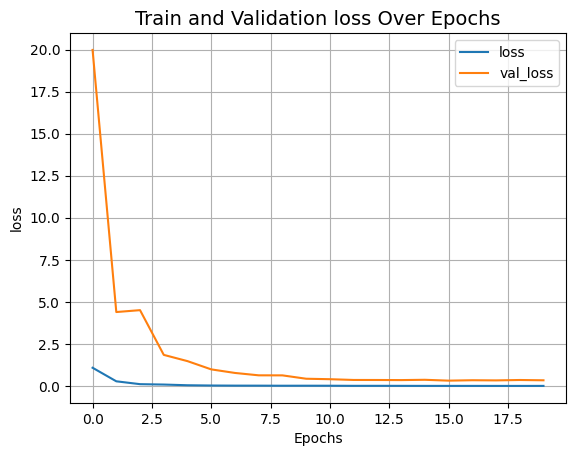

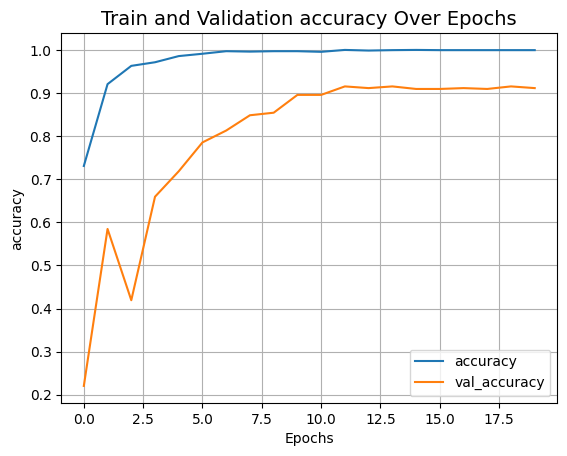

In [82]:
def plot_history(history, item, save_path=None):
    plt.figure()
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title(f"Train and Validation {item} Over Epochs", fontsize=14)
    plt.legend()
    plt.grid()
    
    if save_path:
        plt.savefig(save_path)  # Save the plot to the specified file path
    
    plt.show()

# Example usage assuming 'history' is obtained from model.fit()
plot_history(history1, "loss", save_path="loss_plot.png")
plot_history(history1, "accuracy", save_path="accuracy_plot.png")

In [84]:
import numpy as np
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
)

# Example arrays (replace with your actual data)
# y_true should be the true labels for your test set
# y_pred are the labels predicted by your model
# y_prob is an array of shape (n_samples, n_classes) with the probability estimates
y_true = np.array([0, 1, 2, 3, 0, 1, 2, 3])   # Example true labels
y_pred = np.array([0, 1, 2, 3, 0, 2, 2, 3])   # Example predicted labels
y_prob = np.array([
    [0.8, 0.1, 0.05, 0.05],
    [0.1, 0.7, 0.1, 0.1],
    [0.05, 0.1, 0.8, 0.05],
    [0.05, 0.1, 0.05, 0.8],
    [0.7, 0.1, 0.1, 0.1],
    [0.1, 0.2, 0.6, 0.1],
    [0.1, 0.1, 0.75, 0.05],
    [0.05, 0.1, 0.1, 0.75],
])

# Calculate weighted precision, recall, and F1 score
weighted_precision = precision_score(y_true, y_pred, average='weighted')
weighted_recall = recall_score(y_true, y_pred, average='weighted')
weighted_f1 = f1_score(y_true, y_pred, average='weighted')

# For multi-class ROC AUC, use 'ovr' (one-vs-rest) strategy
roc_auc = roc_auc_score(y_true, y_prob, multi_class='ovr')

print("Weighted Precision:", weighted_precision)
print("Weighted Recall:", weighted_recall)
print("Weighted F1 Score:", weighted_f1)
print("Area Under ROC Curve:", roc_auc)

# Compute the confusion matrix (in counts)
cm = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix (counts):")
print(cm)

# If you want to display the confusion matrix as percentages (row-wise normalization):
cm_percent = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100, decimals=1)
print("\nConfusion Matrix (percentages):")
print(cm_percent)

# Optionally, you can get a full classification report that includes precision, recall, f1, and support per class:
print("\nClassification Report:")
print(classification_report(y_true, y_pred))


Weighted Precision: 0.9166666666666666
Weighted Recall: 0.875
Weighted F1 Score: 0.8666666666666667
Area Under ROC Curve: 1.0

Confusion Matrix (counts):
[[2 0 0 0]
 [0 1 1 0]
 [0 0 2 0]
 [0 0 0 2]]

Confusion Matrix (percentages):
[[100.   0.   0.   0.]
 [  0.  50.  50.   0.]
 [  0.   0. 100.   0.]
 [  0.   0.   0. 100.]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.50      0.67         2
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         2

    accuracy                           0.88         8
   macro avg       0.92      0.88      0.87         8
weighted avg       0.92      0.88      0.87         8



In [110]:
import tensorflow as tf
import shutil

# Assume 'model' is your trained TensorFlow/Keras model

# 1. Save the model in SavedModel format to the folder "saved_model"
model.save("saved_model")

# 2. Compress the folder "saved_model" into a ZIP file named "saved_model.zip"
shutil.make_archive("saved_model", "zip", "saved_model")

print("Model saved and compressed as saved_model.zip")


INFO:tensorflow:Assets written to: saved_model\assets


INFO:tensorflow:Assets written to: saved_model\assets


Model saved and compressed as saved_model.zip
